 # **Basic TensorFlow Deep Neural Network to predict hand written numbers**

## 1. Libraries 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## 1.2. Dataset Import

In [24]:
mnist = tf.keras.datasets.mnist

## 1.3. Split data into train and test

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 1.3.1. Data visulaiztion

<function matplotlib.pyplot.show(close=None, block=None)>

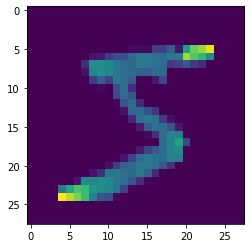

In [26]:
plt.imshow(x_train[0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

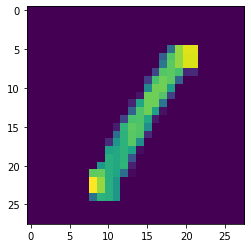

In [27]:
plt.imshow(x_train[3])
plt.show

## 1.3.2. Data Normaliztion

In [28]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [10]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## 2. Model Setup

### Model consist of 1 flatten input layer and 2 hidden layers with 128 hidden neurons and 1 output layer with 10 neurons(0-9)
#### Model Optimizer is **ADAM** 
#### Metrics to monitor is **Accuracy**
#### Loss is **Sparse categorical entropy**

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2679 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1097 - accuracy: 0.9661
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9759


### 2.1. Metrics check on test data 
#### **Accuracy** = 97%
#### **Loss** = 0.090
#### **Note**: Val acc and Val must not be way too larger or smaller than the train acc and loss if this happens that means the model is overfitting 

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_acc, val_loss)


313/313 [==============================] - 1s 1ms/step - loss: 0.0903 - accuracy: 0.9713
0.9713000059127808 0.09029757976531982


### 2.2. Saving the model 

In [15]:
model.save('Num_Reader.model')
new_model = tf.keras.models.load_model('Num_Reader.model')


INFO:tensorflow:Assets written to: Num_Reader.model/assets


In [17]:
predictions = new_model.predict([x_test])
print(predictions)

[[5.5149474e-08 4.8025655e-09 4.2716129e-05 ... 9.9966443e-01
  5.0905629e-07 1.0096767e-06]
 [2.8855787e-08 3.3140928e-04 9.9966717e-01 ... 2.3868314e-09
  1.5631779e-08 3.5450305e-13]
 [8.2127926e-08 9.9981636e-01 2.5062598e-05 ... 7.5939810e-05
  5.1324430e-05 2.1271323e-07]
 ...
 [5.1678493e-09 1.2686036e-07 5.2611847e-07 ... 2.4106912e-06
  1.2407957e-06 1.9449360e-06]
 [3.3474564e-06 3.3077947e-06 4.2414251e-07 ... 1.9394370e-06
  1.0660498e-03 4.5975845e-08]
 [6.2297572e-06 2.3286802e-08 2.8365349e-07 ... 9.0908964e-10
  4.9035865e-08 4.2705182e-09]]


### 3. Model Test 

In [19]:
print(np.argmax(predictions[0]))

7


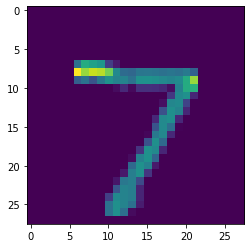

In [20]:
plt.imshow(x_test[0])
plt.show()